In [1]:
import numpy as np
from matplotlib import pyplot as plt
import serial
import serial.tools.list_ports as port_list

In [2]:
# text dari image MNIST digit '8' berukuran 28x28 pixel
img_txt = b'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,203,229,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,47,47,30,95,254,215,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,154,185,185,223,253,253,133,175,255,188,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,253,253,253,246,161,228,253,253,254,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,245,253,158,137,21,0,48,233,253,233,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,254,223,25,0,0,36,170,254,244,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,212,253,161,11,26,178,253,236,113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,155,253,228,80,223,253,253,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,253,253,253,254,253,154,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,253,253,253,254,179,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,171,254,254,254,179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,171,253,253,253,253,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,123,254,253,203,156,253,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,253,254,121,13,93,253,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,239,253,76,8,32,219,253,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,191,0,5,108,234,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132,253,190,5,85,253,236,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,153,253,169,192,253,253,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112,253,253,254,236,129,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,118,243,191,113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0'

In [3]:
img_bytes = np.array([int(i) for i in img_txt.decode('utf-8').split(',')])
img_bytes.shape

(784,)

In [4]:
img_bytes_2d = np.reshape(img_bytes, (28, 28))
img_bytes_2d.shape

(28, 28)

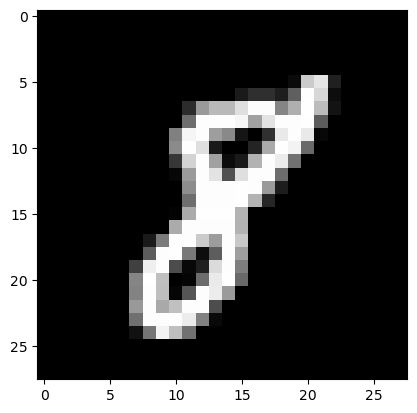

In [5]:
plt.imshow(img_bytes_2d, cmap=plt.get_cmap('gray'))

In [6]:
# koneksi dengan serial port
ser = serial.Serial(port='COM10', baudrate=115200, bytesize=8, timeout=1, stopbits=serial.STOPBITS_ONE)

In [7]:
# kirim ke ZyBo, proses, baca hasil
ser.write(img_txt)
ser.write(b'\n')
inv_img_txt = ser.readline()
inv_img_txt = inv_img_txt.decode('utf-8')
inv_img_txt = inv_img_txt.replace(',\n', '')
print(f'Message from ZyBo: {inv_img_txt}')

Message from ZyBo: 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,244,52,26,223,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,229,208,208,225,160,1,40,242,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,210,101,70,70,32,2,2,122,80,0,67,236,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,145,2,2,2,9,94,27,2,2,1,163,255,255,255,255,255,255,255,2

In [8]:
inv_img_bytes = np.array([int(i) for i in inv_img_txt.split(',')])
inv_img_bytes.shape

(784,)

In [9]:
inv_img_bytes_2d = np.reshape(inv_img_bytes, (28, 28))
inv_img_bytes_2d.shape

(28, 28)

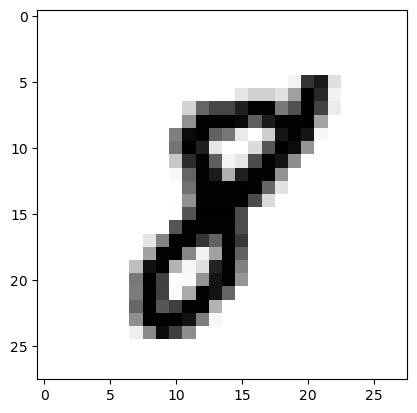

In [10]:
plt.imshow(inv_img_bytes_2d, cmap=plt.get_cmap('gray'))

In [11]:
ser.close()